# Practical 06 — Iris Classification (2)

> **Dataset:** The Iris dataset description and preprocessing details were introduced in Practical 05.  
> **Goal:** Extend the classification study by training and evaluating a **Decision Tree** and a **Naïve Bayes** classifier on the same train/test protocol.

## 1. Import the Iris data from sklearn. 
Read the documenation that describes the data, what the attributes are, and what the classification task is.

In [43]:
# ---- Imports ----
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

# ---- Load Iris dataset ----
# as_frame=True provides a pandas DataFrame for easier inspection
iris = load_iris(as_frame=True)

# Feature matrix (X) and target vector (y)
X = iris.data            # DataFrame of shape (150, 4)
y = iris.target          # Series of shape (150,)

# Metadata
feature_names = iris.feature_names
target_names = iris.target_names

# ---- Quick, concise summary (instead of printing the long DESCR) ----
print("Iris dataset summary")
print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}")
print(f"Features: {feature_names}")
print(f"Classes: {list(target_names)}")
print("Class counts:", dict(Counter(y)))

# Optionally preview first rows
print("\nFirst 5 samples:")
display(X.head())
print("First 5 labels:", y.head().tolist())

# If you still want the full description, uncomment the line below:
# rint(iris.DESCR)

Iris dataset summary
Samples: 150, Features: 4
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa', 'versicolor', 'virginica']
Class counts: {0: 50, 1: 50, 2: 50}

First 5 samples:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


First 5 labels: [0, 0, 0, 0, 0]


## 2. Split the data into two subsets
 Split the data into two subsets:
  - A training subset comprising 75% of the data
  - A testing subset comprising 25% of the data

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, # use a teste sieve of 25%
                                                    random_state=4) # this random state ensures that we get the same subset each time we call this cell

In [45]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

## 3. Use a descision tree classifier
Using a descision tree classifier:
 - Train the classifier using both the `Gini index` and `entropy` criterion for splitting, and a range of `min_samples_split` between 3 and 20.
 - Choose the classifier which has the highest accuracy score as your best classifier.
 - Plot the descision tree for your best classifier.

In [46]:
from sklearn import tree

In [47]:
# Create a dictionary of all the parameters we'll be iterating over
parameters = {'criterion': (?,?),  # this should be the different splitting criteria
              'min_samples_split':[?]} # this should be the different values for min_samples_split
dtc = tree.DecisionTreeClassifier()
gscv = GridSearchCV(estimator=dtc,
                    param_grid=parameters,
                    cv=5,
                    scoring='accuracy')
best_dtc = gscv.fit(X_train, y_train)
best_dtc.best_params_, best_dtc.best_score_

({'criterion': 'gini', 'min_samples_split': 20}, 0.9470355731225297)

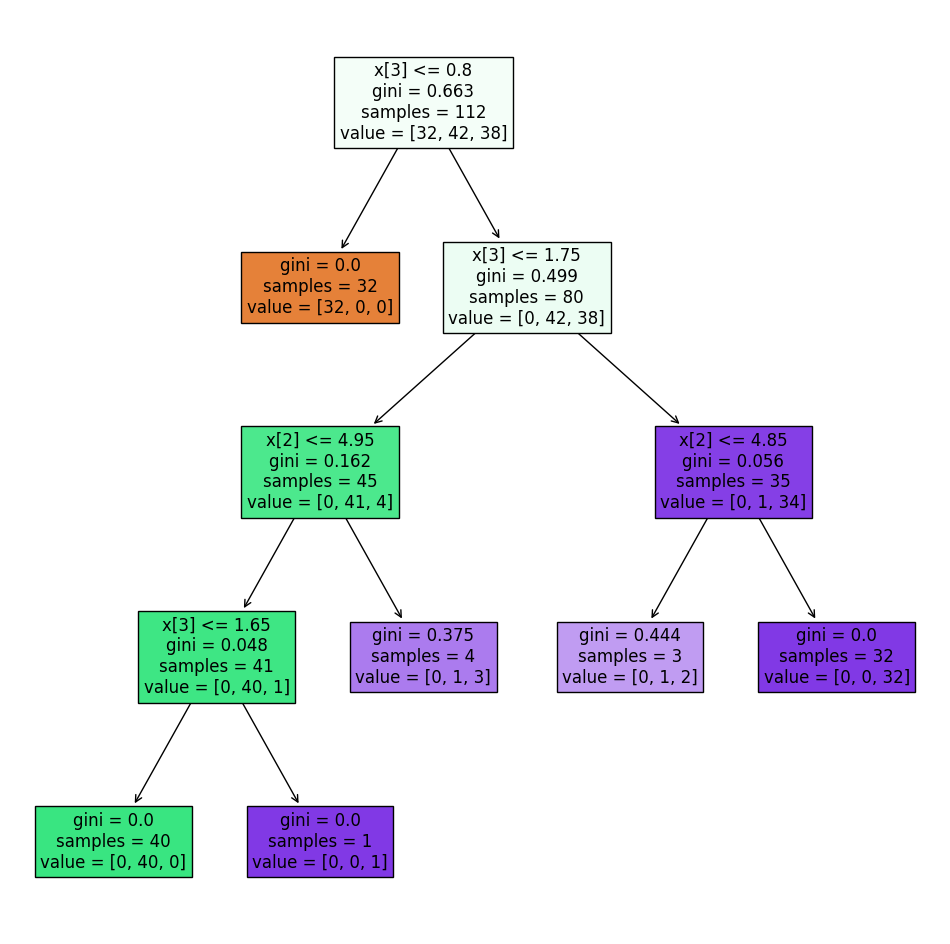

In [48]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
tree.plot_tree(best_dtc.best_estimator_, 
               filled=True, # color the nodes based on class/purity
               ax=ax, fontsize=12)
plt.show()

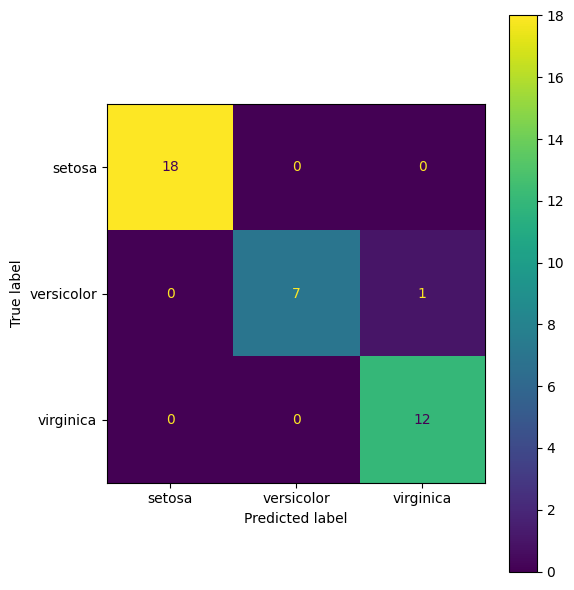

In [49]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))

ConfusionMatrixDisplay.from_estimator(best_dtc.best_estimator_,
                                      X_test, y_test,
                                      display_labels=iris['target_names'],
                                      ax=ax)
plt.tight_layout()
plt.show()

## Use a naive-Bayes clasffieir
Using a naive-Bayes clasffieir:
 - Train the classifier on all the training data.
 - Predict the classes of the test data.
 - Plot a confusion matrix.

In [50]:
from sklearn import naive_bayes

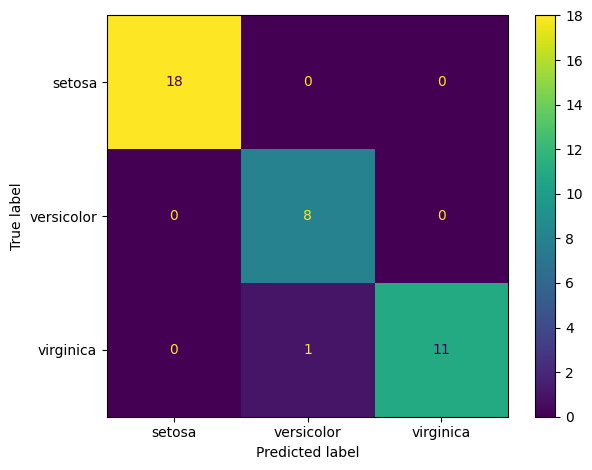

In [51]:
# no parameters to adjust so no need to optimise, just train
fig, ax = plt.subplots(1,1)
nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(nb,
                                      X_test, y_test,
                                      display_labels=iris['target_names'],
                                      ax=ax)
plt.tight_layout()
plt.show()

# Helpful tools

## Corner plot

A useful plot for visualising multi-dimensional data is the corner-plot or pair plot.
There is a function built into pandas called `scatter_matrix`, and the plotting package `seaborn` also has a function called `pairplot`.
Let's have a look at them below.

In [52]:
import pandas as pd
import seaborn as sns

In [53]:
# Load the data and labels as data frams and then join them to make a new one
df1 = pd.DataFrame(X, columns=iris.feature_names)
df2 = pd.DataFrame(y, columns=['class'])
df = df1.join(df2)

In [54]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Plotted with pandas


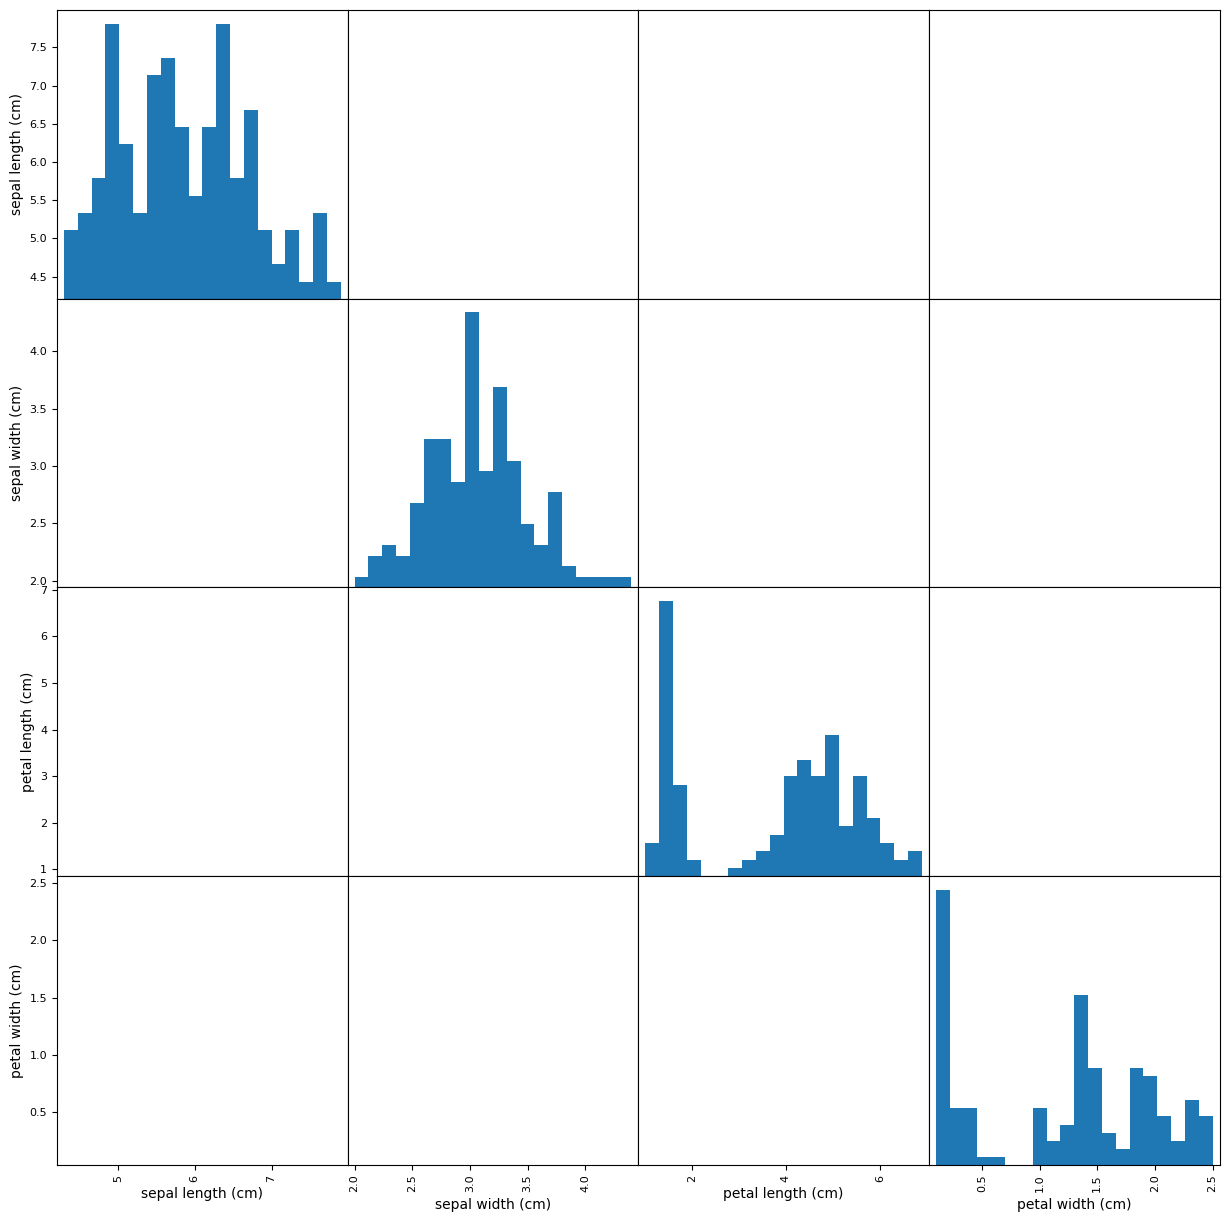

In [55]:
pd.plotting.scatter_matrix(df1,c=df['class'], figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)
print('Plotted with pandas')

## Correlation plot

A correlation matrix is simlar to the corner plot above but it simply reports the correlation between each of the attributes.

We can compute the correlation matrix using pandas with the `df.corr()` method, and the plot using either `matplotlib` or `seaborn`.

In [57]:
# compute correlation matrix
cor = df.corr()

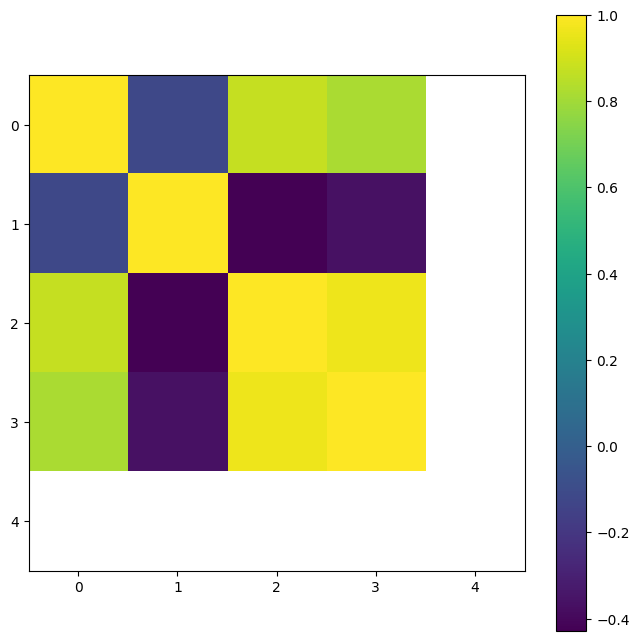

In [58]:
# plot the covariance with matplotlib
fig, ax = plt.subplots(1,1, figsize=(8,8))
im = ax.imshow(cor)
cb = plt.colorbar(ax=ax, mappable=im)
plt.show()

<Axes: >

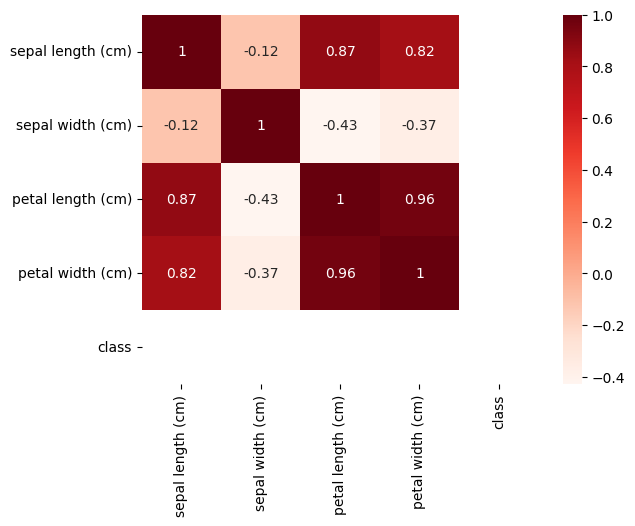

In [59]:
# use seaborn to do the plot
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)

Looking at the correlation plot we can see that the petal length/width are highly correlated with the class attribute and are likely useful attributes.
The fact that they are also highly correlated with each other means that we might be able to use just one of the two features.

The sepal width has much lower correlation and so is probably not so useful.